# Imbalanced learn

imblearn - biblioteka za rad sa nebalansiranim klasama

In [2]:
import imblearn as im
import pandas as pd
from imblearn.datasets import fetch_datasets

In [3]:
mammography = fetch_datasets()['mammography']
X = pd.DataFrame(mammography.data)
y = pd.Series(mammography.target)

In [4]:
print(X.shape)
X.describe()

(11183, 6)


,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


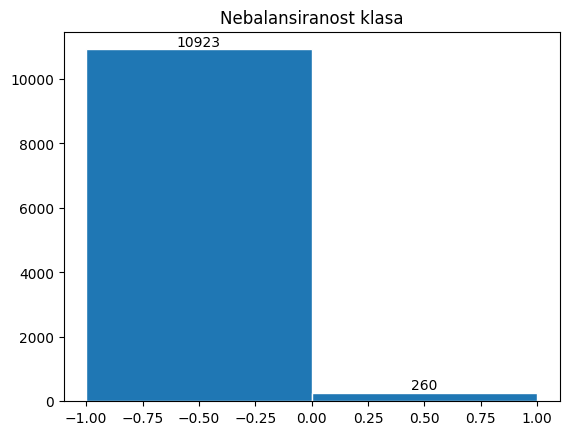

In [6]:
import numpy as np
from matplotlib import pyplot as plt

freq, bins, _ = plt.hist(y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.title('Nebalansiranost klasa')

plt.show()

# Metrike za evaluaciju prilikom rada sa nebalansiranim klasama

U situacijama kada imamo jako nebalansirane klase, ne možemo da koristimo accuracy za evaluaciju modela. Npr. ako 99% instanci koje pripadaju većinskoj klasi. Naš model može klasifikovati sve instance u većinsku (što bi bio jako loš model), ali bi accuracy bila 0,99 (što bi signaliziralo da je model jako dobar). Izveštaj klasifikacije za nebalansirane klase u okviru sklearn-a prikazuje state-of-the-art metrike, kao što su precision/recall/specificity, geometric mean, and index balanced accuracy of the geometric mean.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)